# Computational Geometry notes

This notebook accompanies chapter 7: Computational Geometry theory in "Programming Applied Mathematics for Security". The code was used to generate the figures and analysis which accompanies the theoretical explanation. The rest of the notebook contains more detail on how to work with the Shapely library including how to use the MatPlotLib library to display the shape objects. 

In [1]:
from shapely.geometry import Point, LineString, Polygon, LinearRing
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon as PolyPatch
%matplotlib inline

The simplest object in CG is a point, which is represented programmatically as a Point class which takes an (x,y) location tuple as the only constructor argument. A point has no area or length. It marks a single, infinitely small section of the plane located at the coordinates. In most of mathematics the point (0, 0) is a special Point which is called the origin.

In [2]:
point_a = Point((2.0, 4.0))
point_b = Point((4.0, 0.0))
origin = Point((0, 0))

You can define a LineString using raw value tuples, Point objects, or by mixing the two. LineString objects are straight line segment splines between two or more points. These line segments can cross eachother (making it a complex linestring) You can add the same point to the list multiple times but doing so can slow down computations so it should be avoided if possible.

In [3]:
line_a = LineString([(2.0, 4.0), (4.0, 0.0)])
line_b = LineString([point_a, point_b])
line_c = LineString([(3.3,5.0), origin])

A LineString object has no area because a line segment spline in considered infinitely thin. They do have a non-zero length parameter

In [4]:
print(line_a.area, line_a.length)
print(line_b.area, line_b.length)
print(line_c.area, line_c.length)

0.0 4.47213595499958
0.0 4.47213595499958
0.0 5.990826320300064


LinearRings are a special case of LineStrings which form a closed loop. The sequence can be explicitly closed by passing the same point in the first and last positions. if the first and last points do not match shapely will implicitly close the shape by copying the first indexed point to the end of the list of points. once again the area of a LinearRing will always be 0. The length parameter tells you the combined lengths of the constituent line segments.

In [5]:
ring_a = LinearRing([origin, (4.0,6.0), (6.0, 6.0), origin]) # explicit close
ring_b = LinearRing([(-4.0, -1.0), (3.0,-2.0), (-1.0, -3.0)]) # implicit close

In [6]:
print(ring_a.area, ring_a.length)
print(ring_b.area, ring_b.length)

0.0 17.69638392516655
0.0 14.799724712947127


Polygons can also be constructed using a series of raw value tuples, Point objects, or a mixture of the two. The constructor takes in one or two lists of these points. The first list is used to define the outter shell of the shape. The second list is used to created voids in the interior.

In [7]:
poly_a = Polygon([(2.0,2.0), (4.0,1.0), (5.0,5.0), (2.0,2.0)]) # explictly closed polygon made of raw values
poly_b = Polygon([origin, point_b, point_a]) # implicitly closed polygon made of points
poly_c = Polygon([origin, (-4.0, 3.2), point_a, (5.1, 3.5)]) # Polygon made of mixed points and raw tuples

Polygons have both area and length parameters we can examine

In [8]:
print(poly_a.area, poly_a.length)
print(poly_b.area, poly_b.length)
print(poly_c.area, poly_c.length)

4.5 10.601814290236735
8.0 12.94427190999916
17.9 20.501128301413264


To display the polygon with filled areas we need to create a Matplotlib Polygon patch. This is a limitation of Matplotlib, not Shapely which sees the Polygon object as solid (unless we tell it otherwise).

In [9]:
poly_a_fill = PolyPatch(poly_a.exterior, fill=True, facecolor="Blue")
poly_b_fill = PolyPatch(poly_b.exterior, fill=True, facecolor="Green")
poly_c_fill = PolyPatch(poly_c.exterior, fill=True, facecolor="Red")

You can then plot the exterior coordinates using the plot function, then apply each patch to the plot using the add_patch function.

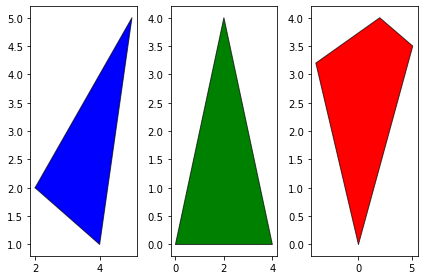

In [10]:
fig, ax = plt.subplots(ncols=3, nrows=1)
ax[0].plot(*poly_a.exterior.xy, color="Black", alpha=0.7,
    linewidth=1, solid_capstyle="round", zorder=2)
ax[0].add_patch(poly_a_fill)
ax[1].plot(*poly_b.exterior.xy, color="Black", alpha=0.7,
    linewidth=1, solid_capstyle="round", zorder=2)
ax[1].add_patch(poly_b_fill)
ax[2].plot(*poly_c.exterior.xy, color="Black", alpha=0.7,
    linewidth=1, solid_capstyle="round", zorder=2)
ax[2].add_patch(poly_c_fill)
fig.tight_layout()
plt.show()

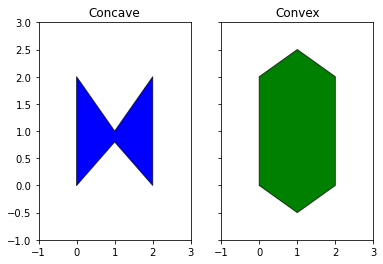

In [11]:
# Define the shapes for the concave vs. convex figure
convex = Polygon([(0, 0), (0, 2), (1, 2.5), (2, 2), (2, 0), (1, -0.5), (0, 0)])
concave = Polygon([(0, 0), (0, 2), (1, 1), (2, 2), (2, 0), (1, 0.8), (0, 0)])

# Create the polygon patches to fill the interiors
concave_fill = PolyPatch(concave.exterior, fill=True, facecolor="Blue")
convex_fill = PolyPatch(convex.exterior, fill=True, facecolor="Green")

# Create the figure the same as before
fig, ax = plt.subplots(ncols=2, nrows=1, sharey=True)
ax[0].plot(*concave.exterior.xy, color="Black", alpha=0.7,
    linewidth=1, solid_capstyle="round", zorder=2)
ax[0].add_patch(concave_fill)
ax[0].set_title('Concave')
ax[0].set_ylim(-1, 3)
ax[0].set_xlim(-1, 3)

ax[1].plot(*convex.exterior.xy, color="Black", alpha=0.7,
linewidth=1, solid_capstyle="round", zorder=2)
ax[1].add_patch(convex_fill)
ax[1].set_title('Convex')
ax[1].set_ylim(-1, 3)
ax[1].set_xlim(-1, 3)

plt.savefig("Figure_7-1.png")
plt.savefig("Figure_7-1.svg", format="svg")
plt.show()


The code in the next cell creates the first example image from the chapter. The process is similar to displaying the Polygon patches above, but in this case we need to create a separate patch to account for the hole in the body of the third plot.

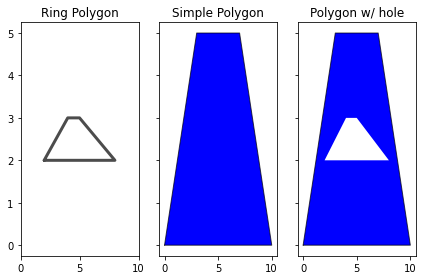

In [12]:
rbus_a = Polygon([(2.0, 2.0), (8.0, 2.0), (5.0, 3.0), (4.0, 3.0)])
rbus_b = Polygon([origin, (10.0, 0.0), (7.0, 5.0), (3.0, 5.0)])
rbus_hole = LinearRing([(2.0, 2.0), (8.0, 2.0), (5.0, 3.0), (4.0, 3.0)])
rbus_b_holed = Polygon(rbus_b, [rbus_hole])
rbus_b_fill = PolyPatch(rbus_b.exterior, fill=True, facecolor="Blue")
rbus_hole_fill = PolyPatch(rbus_hole.coords, fill=True, facecolor="White")
fig, ax = plt.subplots(ncols=3, nrows=1, sharey=True)
ax[0].plot(*rbus_a.exterior.xy, color="Black", alpha=0.7,
    linewidth=3, solid_capstyle="round", zorder=2)
ax[0].set_xlim(0,10)
ax[1].plot(*rbus_b.exterior.xy, color="Black", alpha=0.7,
    linewidth=1, solid_capstyle="round", zorder=2)
ax[1].add_patch(rbus_b_fill)
ax[2].add_patch(PolyPatch(rbus_b.exterior, fill=True, facecolor="Blue"))
ax[2].add_patch(rbus_hole_fill)
ax[2].plot(*rbus_b_holed.exterior.xy, color="Black", alpha=0.7,
    linewidth=1, solid_capstyle="round", zorder=2)
ax[0].set_title("Ring Polygon")
ax[1].set_title("Simple Polygon")
ax[2].set_title("Polygon w/ hole")
fig.tight_layout()
plt.savefig("Figure_7-2.png")
plt.savefig("Figure_7-2.svg", format="svg")
plt.show()

This cell defines the shape objects used in the Park example. I define the exterior using an implicitly closed polygon. I define holes in the polygon to represent the areas where attendees cannot go. This code goes on to customize the line display using different markers for the internal and external points.

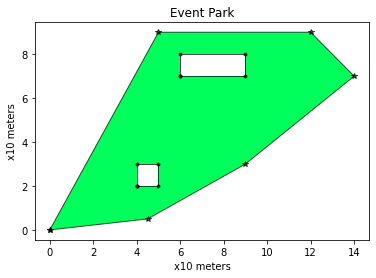

In [13]:
park = Polygon([(0,0), (4.5, 0.5), (9, 3), (14,7), (12,9), (5,9)])
info_booth = Polygon([(4,2), (5,2), (5,3), (4,3)])
stage = Polygon([(6,7), (9,7), (9,8), (6,8)])
park_fill = PolyPatch(park.exterior, fill=True, facecolor="#00FF5A")
info_fill = PolyPatch(info_booth.exterior, fill=True, facecolor="White")
stage_fill = PolyPatch(stage.exterior, fill=True, facecolor="White")

fig, ax = plt.subplots(ncols=1, nrows=1)
ax.plot(*park.exterior.xy, color="Black", alpha=0.7,
    linewidth=1, solid_capstyle="round", zorder=2, marker="*")
ax.plot(*info_booth.exterior.xy, color="Black", alpha=0.7,
    linewidth=1, solid_capstyle="round", zorder=2, marker=".")
ax.plot(*stage.exterior.xy, color="Black", alpha=0.7,
    linewidth=1, solid_capstyle="round", zorder=2, marker=".")
ax.add_patch(park_fill)
ax.add_patch(info_fill)
ax.add_patch(stage_fill)
ax.set_title("Event Park")
ax.set_xlabel("x10 meters")
ax.set_ylabel("x10 meters")
#fig.tight_layout()
plt.savefig("Figure_7-3.png")
plt.savefig("Figure_7-3.svg", format="svg")
plt.show()

Analysis can be performed using the attributes of the shapes. It's important to remember the scale you used when defining the shapes otherwise your analysis will not make any sense. In this case I scaled the area of the park down to 1/10th the original, so I will multiply the results to reverse the scaling.

In [14]:
event_area = (park.area - (info_booth.area + stage.area)) * 10
print ("%.2f m^2 park area" % (park.area * 10))
print ("%.2f m^2 info booth area" % (info_booth.area * 10))
print ("%.2f m^2 stage area" % (stage.area * 10))
print ("%.2f m^2 usable area" % event_area)

675.00 m^2 park area
10.00 m^2 info booth area
30.00 m^2 stage area
635.00 m^2 usable area


Shapely can actually handle the above calculation automatically by creating a complex polygon with holes removed for the space of the stage and info booth.

In [15]:
info_booth = LinearRing([(4,2), (5,2), (5,3), (4,3)])
stage = LinearRing([(6,7), (9,7), (9,8), (6,8)])
event_shape = Polygon(list(park.exterior.coords), [info_booth, stage])
print ("%.2f m^2 usable area" % (event_shape.area*10))

635.00 m^2 usable area


Displaying a triangulation result requires you loop over shapes in the result list creating a PolyPatch for each. The following code displays the two separate tessellation examples.

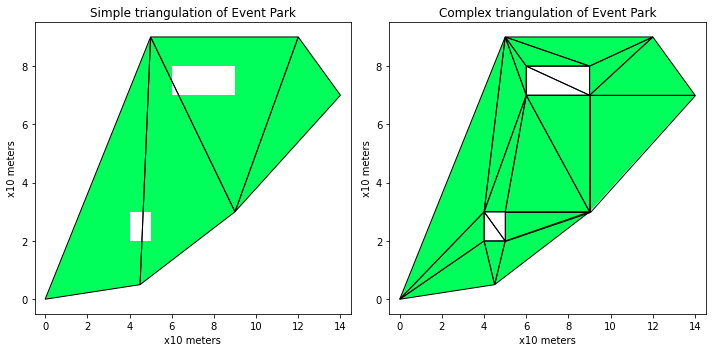

In [16]:
from shapely.ops import triangulate
triangulated = triangulate(park.exterior)#, edges=True)
tess = triangulate(event_shape)#, edges=True)
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(10,5))
park_fill1 = PolyPatch(park.exterior, fill=True, facecolor="#00FF5A")
info_fill1 = PolyPatch(info_booth.coords, fill=True, facecolor="White")
stage_fill1 = PolyPatch(stage.coords, fill=True, facecolor="White")
park_fill2 = PolyPatch(park.exterior, fill=True, facecolor="#00FF5A")
info_fill2 = PolyPatch(info_booth.coords, fill=True, facecolor="White")
stage_fill2 = PolyPatch(stage.coords, fill=True, facecolor="White")
ax[0].add_patch(park_fill1)
ax[0].add_patch(info_fill1)
ax[0].add_patch(stage_fill1)
ax[1].add_patch(park_fill2)
ax[1].add_patch(info_fill2)
ax[1].add_patch(stage_fill2)
for t in triangulated:
    tri_patch = PolyPatch(t.exterior.coords, fill=False)
    ax[0].add_patch(tri_patch)
for t in tess:
    tri_patch = PolyPatch(t.exterior.coords, fill=False)
    ax[1].add_patch(tri_patch)
for i in range(len(ax)):
    ax[i].set_xlim(-0.5,14.5)
    ax[i].set_ylim(-0.5,9.5)
    ax[i].set_xlabel("x10 meters")
    ax[i].set_ylabel("x10 meters")
ax[0].set_title("Simple triangulation of Event Park")
ax[1].set_title("Complex triangulation of Event Park")
fig.tight_layout()
plt.savefig("Figure_7-4.png")
plt.savefig("Figure_7-4.svg", format="svg")
plt.show()

These calculations are used in the park example. See the text for an explanation on how I came to these figures. In the code we use the math.floor function on the calculation to give a lower bound as the result.

In [17]:
import math
safe_capacity = int(math.floor(event_area / 0.75)) # 8ft sq
max_capacity = int(math.floor(event_area / 0.37)) # 4ft sq
print("Comfortable capacity: %d people" % safe_capacity)
print("Maximum safe capacity: %d people" % max_capacity)

Comfortable capacity: 846 people
Maximum safe capacity: 1716 people


The next cell loops over the resulting shapes from the tessellating the complex polygon version of the park. For each resulting triangle the area is calculated and sorted using the sort function. The 15 largest areas are then used to create a list of centroids.
>In mathematics and physics, the centroid or geometric center of a plane figure is the arithmetic mean position of all the points in the figure. You can imagine this informally as the point at which a cutout of the shape could be perfectly balanced on the tip of a pin" (<a href="https://en.wikipedia.org/wiki/Centroid">from Wikipedia</a>).

Centroids are useful for several practical applications besides the one presented in the text, such as finding the center of mass for a shape. If a polygon has a uniform density throughout, its center of mass coincides with its centroid.

In [18]:
tess = triangulate(event_shape)
area_dict = {i: tess[i].area for i in range(len(tess))}
sort_areas = sorted(area_dict.items(), key=lambda x: x[1], reverse=True)
sec_points = [tess[t[0]].centroid.coords[0] for t in sort_areas[:15]]
sec_points

[(3.0, 4.0),
 (10.666666666666668, 5.666666666666666),
 (6.666666666666667, 4.333333333333333),
 (8.0, 5.666666666666667),
 (11.666666666666668, 7.666666666666667),
 (5.0, 6.333333333333333),
 (2.833333333333333, 0.8333333333333333),
 (8.666666666666666, 8.666666666666666),
 (6.166666666666666, 1.8333333333333335),
 (2.6666666666666665, 1.6666666666666667),
 (5.0, 4.333333333333333),
 (6.333333333333333, 2.6666666666666665),
 (6.666666666666667, 8.333333333333334),
 (10.0, 8.0),
 (7.0, 7.333333333333333)]

The next cell creates the figure which displays the centroid location for the top 15 triangular regions. The majority of the code should look familiar from the previous figures. You can see near the bottom I use a zip and nest unpack function to create a list of coordinates for each of the centroids. Doing it this way makes it easier to display the points using the ploy function

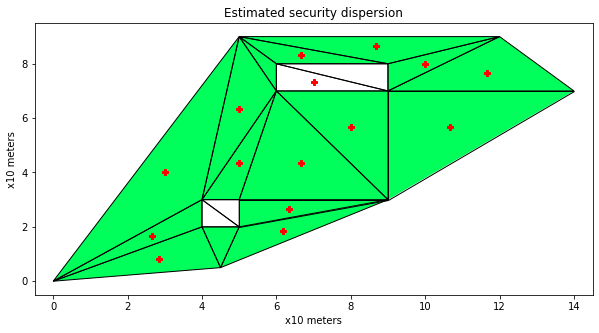

In [19]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10,5))
park_fill = PolyPatch(park.exterior, fill=True, facecolor="#00FF5A")
info_fill = PolyPatch(info_booth.coords, fill=True, facecolor="White")
stage_fill = PolyPatch(stage.coords, fill=True, facecolor="White")
ax.add_patch(park_fill)
ax.add_patch(info_fill)
ax.add_patch(stage_fill)
for t in tess:
    tri_patch = PolyPatch(t.exterior.coords, fill=False)
    ax.add_patch(tri_patch)
ax.set_xlim(-0.5,14.5)
ax.set_ylim(-0.5,9.5)
ax.set_xlabel("x10 meters")
ax.set_ylabel("x10 meters")
ax.set_title("Estimated security dispersion")
res = list(zip(*sec_points))
ax.plot(res[0], res[1], "P", color="Red")
plt.savefig("Figure_7-5.png")
plt.savefig("Figure_7-5.svg", format="svg")
plt.show()

In [20]:
finalized = []
s2 = Polygon(stage)
i2 = Polygon(info_booth)
for guard_station in sec_points:
    i = 0
    new_station = Point(guard_station)
    while any([
            (s2.contains(new_station)),
            (i2.contains(new_station))
    ]):
        if 15+i > len(sort_areas):
            print("Couldn't place")
            break
        new_area = sort_areas[15+i]
        i += 1
        poss = tess[new_area[0]].centroid.coords[0]
        if poss not in sec_points:
            new_station = poss
            new_station = Point(poss)
    finalized.append(list(new_station.coords[0]))
finalized

[[3.0, 4.0],
 [10.666666666666668, 5.666666666666666],
 [6.666666666666667, 4.333333333333333],
 [8.0, 5.666666666666667],
 [11.666666666666668, 7.666666666666667],
 [5.0, 6.333333333333333],
 [2.833333333333333, 0.8333333333333333],
 [8.666666666666666, 8.666666666666666],
 [6.166666666666666, 1.8333333333333335],
 [2.6666666666666665, 1.6666666666666667],
 [5.0, 4.333333333333333],
 [6.333333333333333, 2.6666666666666665],
 [6.666666666666667, 8.333333333333334],
 [10.0, 8.0],
 [4.5, 1.5]]

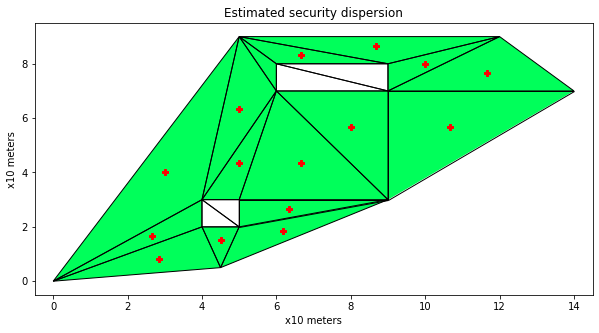

In [21]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10,5))
park_fill = PolyPatch(park.exterior, fill=True, facecolor="#00FF5A")
info_fill = PolyPatch(info_booth.coords, fill=True, facecolor="White")
stage_fill = PolyPatch(stage.coords, fill=True, facecolor="White")
ax.add_patch(park_fill)
ax.add_patch(info_fill)
ax.add_patch(stage_fill)
for t in tess:
    tri_patch = PolyPatch(t.exterior.coords, fill=False)
    ax.add_patch(tri_patch)
ax.set_xlim(-0.5,14.5)
ax.set_ylim(-0.5,9.5)
ax.set_xlabel("x10 meters")
ax.set_ylabel("x10 meters")
ax.set_title("Estimated security dispersion")
res = list(zip(*finalized))
ax.plot(res[0], res[1], "P", color="Red")
plt.savefig("Figure_7-6.png")
plt.savefig("Figure_7-6.svg", format="svg")
plt.show()

The order you pass points in during the creation of a shape is important for a lot of algorithms to operate efficiently. unfortunately you may get coordinate data from sources which don't always follow convention (which is to define points in counter-clockwise, also called CCW, order). You can check if a polygon or LinearRing was defined in CCW order using the is_ccw attribute.

In [22]:
print(event_shape.exterior.is_ccw)
ring = LinearRing([(0,0), (1,1), (1,0)])
print(ring.is_ccw)

True
False


A ring with an undesired orientation can be reversed like this:

In [23]:
ring.coords = list(ring.coords)[::-1]
ring.is_ccw

True